# Urban Street Network Analysis in a Computational Notebook

Geoff Boeing

Department of Urban Planning and Spatial Analysis, Sol Price School of Public Policy, University of Southern California. 201B Lewis Hall, Los Angeles, California 90089-0626, USA.

## Abstract

x

## Introduction

Urban planning, like many academic disciplines related or adjacent to regional science, comprises a set of scholars, students, and working professionals with a wide range of computational aptitude. Some urban planners focus on policymaking within the political constraints of city hall; others employ qualitative methods to work in and with vulnerable communities; others use simulation models to forecast urbanization patterns and infrastructure needs; others intermingle these – and many other – different approaches to understanding and shaping the city. Yet all urban planners benefit from basic quantitative literacy and an ability to reason with data. Such skills and professional needs are increasingly merging with the growing importance of computational workflows and computational thinking in the urban context.

A traditional academic divide existed between code creators and code users. The former would develop software tools and workflows for professional or research uses, and the latter would use them to conduct analyses or answer scientific questions. Today, however, the boundary line is increasingly blurred as computation percolates throughout both the natural and social sciences. As quantitatively-oriented academics slowly shift away from monolithic, closed-source data analysis software like SPSS and ArcGIS, they increasingly embrace coding languages like R and Python to conduct their research. Writing shareable, reproducible, and recomputable scripts in R or Python to acquire, transform, describe, visualize, and model data, these analysts act as both code creators and code users.

An important trend in this trajectory has been the widespread adoption of the computational notebook. A computational notebook is a computer file that replaces the traditional lab notebook and intersperses plain-language narrative, hyperlinks, and images with snippets of code – a paradigm known as literate programming (Knuth 1992). This has pedagogical value in introducing students to computational thinking and coding techniques while thoroughly explaining each new language facet as it is introduced. Computational notebooks also offer research value in documenting data, questions, hypotheses, procedures, experiments, and results in detail alongside each’s attendant computations. These notebooks are easily distributed and work well with version control systems like Git because they are simply structured text files.

Urban planning and its related disciplines stand to benefit from the adoption of computational notebooks in pedagogy, research, and practice. Computation is increasingly central to the field and its practitioners benefit from more open and reproducible approaches to analyzing urban data and predicting city futures (Kontokosta 2018; Batty 2019). In the Python universe, for example, numerous tools now exist urban analytics and planning processes such as data wrangling/analysis (pandas), visualization (matplotlib), geospatial data wrangling/analysis (geopandas), spatial econometrics and analysis (pySAL), mapping (cartopy), web mapping (folium), network analysis (networkx), land use modeling/simulation (UrbanSim), activity-based travel modeling (ActivitySim), and computational notebooks (jupyter)

Another Python tool useful for urban planning research and practice – and the primary subject of this article – is OSMnx, a package for street network analysis (Boeing 2017). OSMnx allows users to download spatial data (including building footprints, points of interest, street networks, and other networked infrastructure) from OpenStreetMap then model, analyze, and visualize them. OSMnx's demos and tutorials are provided in Jupyter notebook format to introduce users to its functionality and capabilities. This article introduces OSMnx as a computational tool for urban street network analysis by way of these computational notebooks. It describes their repository and reproduces examples from them here. In doing so, it also describes how to interactively execute the code in this article by using Docker to run the computational environment and Jupyter Lab as an interactive web-based interface.

First, this article describes how to run OSMnx's computational environment, with Docker. Then it presents the repository containing OSMnx's demo and tutorial notebooks. Next it demonstrates the use of OSMnx interactively in the article itself through a synoptic tutorial adapted from this repository. Finally, it concludes with a discussion of the prospects of computational notebooks for easing the adoption of computational tools in urban analytics and planning.

## The OSMnx Examples Repository

OSMnx's official examples, demos, and tutorials are in Jupyter notebook format in a [GitHub repository](https://github.com/gboeing/osmnx-examples). The repository's root contains a licence file, a readme file, an environment definition file, repository contributing guidelines, and a notebooks folder. All the example notebooks are contained within that folder. The repository contains 19 thematically organized Jupyter notebook files that provide a short self-directed tutorial-style course in using OSMnx. The following notebooks are included there:

  1. An introductory survey of features
  1. A more comprehensive overview of OSMnx's basic functionality
  1. Using OSMnx to produce shapefiles
  1. Modeling and visualizing street networks in different places at different scales
  1. Using OSMnx's network topology cleaning and simplification features
  1. Saving and loading data to/from disk with OSMnx
  1. Conducting street network analyses with OSMnx and its networkx dependency
  1. Visualizing street networks and study sites
  1. Working with dual graphs of street networks
  1. Producing figure-ground diagrams for urban form analysis
  1. Working with building footprints
  1. Interactive web mapping of street networks and routes
  1. Attaching elevations to the network and calculating street grades
  1. Working with isolines and isochrones
  1. Cleaning complex street intersections
  1. Calculating street bearings
  1. Working with other types of spatial infrastructure
  1. Visualizing street network orientation with polar histograms
  1. Interfacing between OSMnx and igraph for fast algorithm implementations in the C language

(Description of the resource and how it has been created)

## The Computational Environment

This article can be read in its static form (HTML or PDF) or it can be executed interactively (via its .ipynb Jupyter notebook file). For interactive execution, install Docker and run the OSMnx container as follows. First, download and install [Docker Desktop](https://www.docker.com/products/docker-desktop). Once it is installed and running on your computer, open Docker's settings/preferences and ensure that your local drives are shared with Docker. Then run the [OSMnx Docker container](https://hub.docker.com/r/gboeing/osmnx) (which contains Python and all the packages needed to run OSMnx, including Jupyter Lab) by following the platform-specific instructions below.

If you are on *Windows* open a command prompt, change directory to the location of this notebook file, and run:

```
docker run --rm -it -p 8888:8888 -v "%cd%":/home/jovyan/work gboeing/osmnx:v10
```

If you are on *Mac/Linux* open a terminal window, change directory to the location of this notebook file, and run:

```
docker run --rm -it -p 8888:8888 -v "$PWD":/home/jovyan/work gboeing/osmnx:v10
```

Once the container is running as described above, open your computer's web browser and visit [http://localhost:8888](http://localhost:8888) to access Jupyter Lab and open this article's notebook file.

## Street Network Analysis with OSMnx

(Showcase the resource and identify potential applications)

Here we highlight material from the notebooks in the repository above, adapting their code to this interactive article to introduce OSMnx and demonstrate the capabilities of a computational notebook.

First we import necessary packages:

In [1]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
from IPython.display import Image
from pprint import pprint

Next we import OSMnx itself, configure it, and display its version number:

In [2]:
import osmnx as ox
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11dev'

The configuration step tells OSMnx to log its actions to the terminal window and to use a cache. The cache saves a local copy of any data downloaded by OSMnx to prevent re-downloading the same thing every time the code is run.

Then we use OSMnx to download the street network of Piedmont, California, construct a graph model (via networkx), and plot the network (via matplotlib):

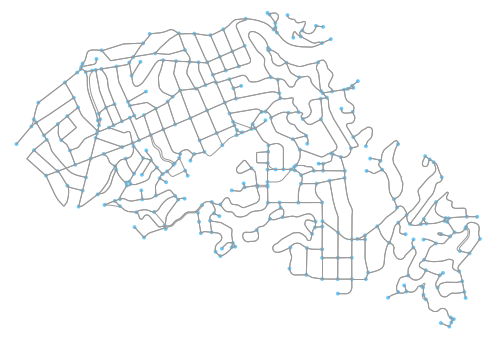

In [3]:
G = ox.graph_from_place('Piedmont, California, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

In the figure above, the network's intersections and dead-ends (or, "nodes") appear as light blue circles and its street segments (or, "edges") appear as gray lines. This is the street network within the municipal boundaries of the city of Piedmont, California. Note that we specified `network_type='drive'`, so this is specifically the drivable network in the city. OSMnx can also automatically download and model walkable and bikeable street networks by changing this argument.

### Computing Network Indicators

Now that we have a model of the network, we can calculate some statistics and indicators. First, what area does our network cover in square meters? To calculate this, we project the graph, convert its projected nodes to a geopandas GeoDataFrame, then calculate the area of a convex hull around these nodes:

In [4]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

4224782.349449131

So this network covers approximately 4.2 square km. When projecting the graph, OSMnx automatically determines the best UTM zone for projection, based on the network's centroid.

Next, we can inspect some basic stats about the network:

In [5]:
stats = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
pprint(stats)

{'circuity_avg': 1.113545251740355,
 'clean_intersection_count': 271,
 'clean_intersection_density_km': 64.1453162753664,
 'edge_density_km': 26951.828421373437,
 'edge_length_avg': 121.39190724946685,
 'edge_length_total': 113865.60899999991,
 'intersection_count': 312,
 'intersection_density_km': 73.84995822108604,
 'k_avg': 5.421965317919075,
 'm': 938,
 'n': 346,
 'node_density_km': 81.89771007851208,
 'self_loop_proportion': 0.006396588486140725,
 'street_density_km': 14061.652905680734,
 'street_length_avg': 121.23963877551029,
 'street_length_total': 59407.42300000004,
 'street_segments_count': 490,
 'streets_per_node_avg': 2.953757225433526,
 'streets_per_node_counts': {0: 0, 1: 34, 2: 0, 3: 263, 4: 47, 5: 1, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
                                 1: 0.09826589595375723,
                                 2: 0.0,
                                 3: 0.7601156069364162,
                                 4: 0.13583815028901733,
              

For example, we can see that this network has 346 nodes and 938 edges. The streets in this network are 11% more circuitous than straight-line would be. The average street segment length is 121 meters.

We can inspect more stats (mostly topological in nature) with the `extended_stats` function. As the results of many of these indicators is verbose (i.e., at the node-level), we print only the indicators' names here:

In [6]:
more_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
for key in sorted(more_stats.keys()):
    print(key)

avg_neighbor_degree
avg_neighbor_degree_avg
avg_weighted_neighbor_degree
avg_weighted_neighbor_degree_avg
betweenness_centrality
betweenness_centrality_avg
center
closeness_centrality
closeness_centrality_avg
clustering_coefficient
clustering_coefficient_avg
clustering_coefficient_weighted
clustering_coefficient_weighted_avg
degree_centrality
degree_centrality_avg
diameter
eccentricity
pagerank
pagerank_max
pagerank_max_node
pagerank_min
pagerank_min_node
periphery
radius


Additional information about the various indicators in OSMnx's [stats module](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats) is available online.

We can save our graph to disk as an ESRI shapefile or a GraphML file (an open-source format for graph serialization):

In [7]:
ox.save_graph_shapefile(G, filename='mynetwork_shapefile')
ox.save_graphml(G, filename='mynetwork.graphml')

### Visualize Street Centrality

OSMnx is built on top of networkx, a powerful network analysis package developed at Los Alamos National Laboratory. We can use it to calculate and visualize the centrality of different streets in the network. First, we convert our graph to its line graph (aka, dual graph) so that the edges become nodes and the nodes become edges, then we calculate the distance-weighted closeness centrality of each street:

In [8]:
edge_centrality = nx.closeness_centrality(nx.line_graph(G), distance='length')

Now that we have calculated the centrality of each street in the network, we visualize it with matplotlib and OSMnx's `plot_graph` function:

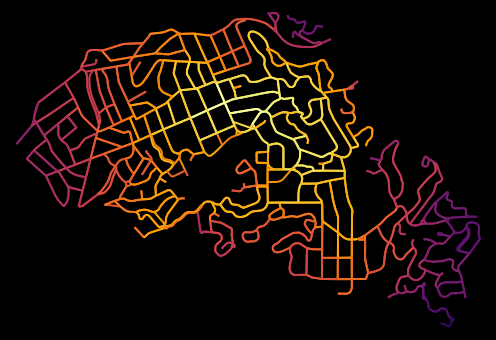

In [9]:
# make a list of edge centrality values for the graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# get a color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph by closeness centrality in the line graph
fig, ax = ox.plot_graph(G, bgcolor='black', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=2, edge_alpha=1)

### Routing

In [10]:
# get the nearest network node to each point
orig_node = ox.get_nearest_node(G, (37.828903, -122.245846))
dest_node = ox.get_nearest_node(G, (37.812303, -122.215006))

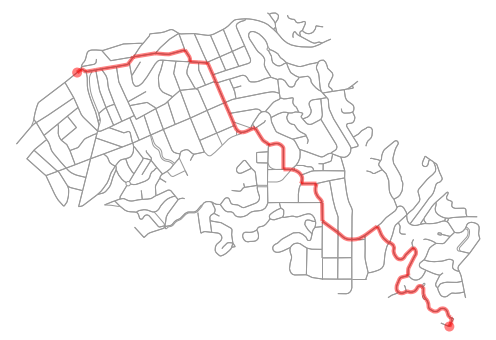

In [11]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [12]:
# how long is our route in meters?
nx.shortest_path_length(G, orig_node, dest_node, weight='length')

4536.361000000001

In [13]:
# how far is it between these two nodes as the crow flies?
ox.great_circle_vec(G.node[orig_node]['y'], G.node[orig_node]['x'],
                    G.node[dest_node]['y'], G.node[dest_node]['x'])

3123.7985450057035

### Get Networks Other Ways

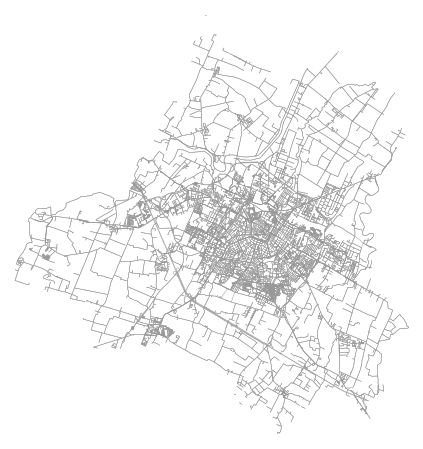

In [18]:
# you can get networks anywhere in the world
G = ox.graph_from_place('Modena, Italy', retain_all=True)
fig, ax = ox.plot_graph(G, fig_height=8, node_size=0, edge_linewidth=0.5)

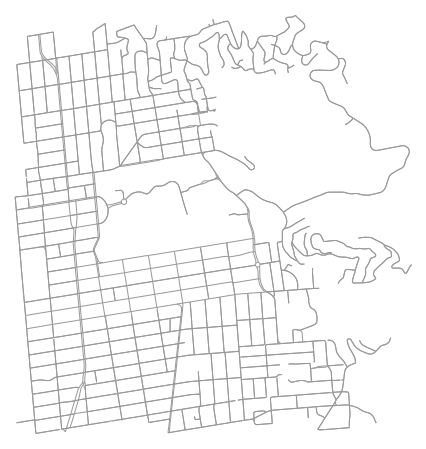

In [21]:
# or get network by coordinates, bounding box, or any custom polygon shape
# useful when OSM just doesn't have a polygon for the place you want
wurster_hall = (37.870605, -122.254830)
one_mile = 1609 #meters
G = ox.graph_from_point(wurster_hall, distance=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=8, node_size=0)

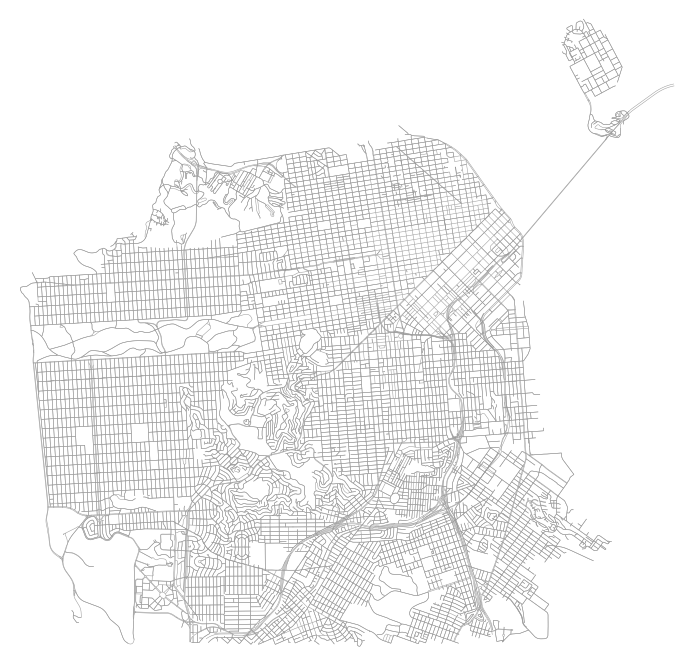

In [22]:
# make query an unambiguous dict to help the geocoder find specifically what you're looking for
place = {'city'   : 'San Francisco',
         'state'  : 'California',
         'country': 'USA'}
G = ox.graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0, edge_linewidth=0.5)

### Elevation

Requires a Google Maps API key:

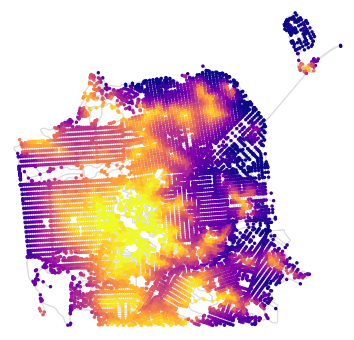

In [23]:
# add elevation to nodes automatically, calculate edge grades, plot network
from keys import google_elevation_api_key
G = ox.add_node_elevations(G, api_key=google_elevation_api_key)
G = ox.add_edge_grades(G)
nc = ox.get_node_colors_by_attr(G, 'elevation', cmap='plasma', num_bins=20)
fig, ax = ox.plot_graph(G, fig_height=6, node_color=nc, node_size=12, node_zorder=2, edge_color='#dddddd')

### Get Other Infrastructure

Get the New York subway's rail network

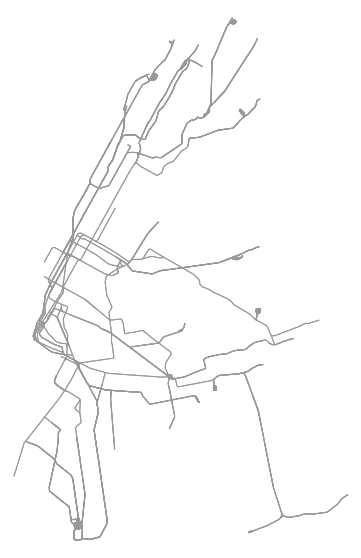

In [24]:
G = ox.graph_from_place('New York City, New York, USA',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        network_type='none', infrastructure='way["railway"~"subway"]')

fig, ax = ox.plot_graph(G, fig_height=10, node_size=0)

Note this is rail *infrastructure* and thus includes crossovers, sidings, spurs, yards, etc. For station-based rail network, you should prob download a station adjacency matrix elsewhere.

Building footprints near New York's Empire State Building:

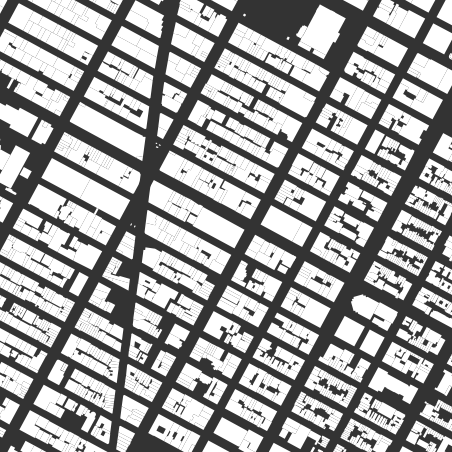

In [26]:
point = (40.748482, -73.985402)
dist = 612
gdf = ox.footprints_from_point(point=point, distance=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.bbox_from_point(point=point, distance=dist, project_utm=True)
fig, ax = ox.plot_footprints(gdf_proj, bgcolor='#333333', color='w', figsize=(4,4), bbox=bbox,
                             save=True, show=False, close=True, filename='buildings', dpi=150)
Image('images/buildings.png', height=300, width=300)

Points of interest near:

In [27]:
gdf = ox.pois_from_point(point=point, distance=dist, amenities=['restaurant'])
gdf[['name', 'cuisine']].dropna().head()

,name,cuisine
561042187,Les Halles,french
1297282272,Fresh Mexican Grill,mexican
1383914860,The Breslin,gastropub
1416478552,Murry Hill Diner,american;breakfast;diner;coffee_shop
1427212491,Pera,mediterranean


## Conclusion

x

## References

Batty, M. (2019). Urban Analytics Defined. Environment and Planning B: Urban Analytics and City Science, 46(3), 403–405. https://doi.org/10.1177/2399808319839494

Boeing, G. (2017). OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks. Computers, Environment and Urban Systems, 65, 126–139. https://doi.org/10.1016/j.compenvurbsys.2017.05.004

Knuth, D. E. (1992). Literate Programming. Stanford, CA: Center for the Study of Language and Information.

Kontokosta, C. E. (2018). Urban Informatics in the Science and Practice of Planning. Journal of Planning Education and Research, (online first), 0739456X1879371. https://doi.org/10.1177/0739456X18793716